In [1]:
%matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tdt

import matplotlib.pyplot as plt
import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw

import probeinterface as pi
from probeinterface import Probe
from probeinterface.plotting import plot_probe

In [3]:
# I think ACR_9-control1 is a good block to start with
block_path = '/Volumes/opto_loc/Data/ACR_9/ACR_9-control1/'

#then could just write the binary to a directory called 'binary' in that subject's folder
binary_path = '/Volumes/opto_loc/Data/ACR_PROJECT_MATERIALS/ACR_9/binary'

In [ ]:
#This function both reads the TDT data AND exports the binary files. Basically always the store will be called 'NNXr'. Each channel is a separate SEV file and gets written to a separate binary file, which is why I have to generate a separate path for each channel below:
test = tdt.read_block(block_path, t1=0, t2=3600, store='NNXr', export='binary', outdir=bin_path)

In [4]:
#Generate a path for each binary file, each corresponding to a channel
paths = []
for i in range(1, 17):
    path = '/Volumes/opto_loc/Data/ACR_PROJECT_MATERIALS/binary/NNXr_' + str(i) + '.f32'
    paths.append(path)


In [6]:
# Use SI to read the binary files
fs = 24414.0625
test_ex = si.core.read_binary(paths, fs, 16, dtype='float32')
test_ex_concat = si.core.concatenate_recordings([test_ex])

(<matplotlib.collections.PolyCollection at 0x7f508885ba90>,
 <matplotlib.collections.PolyCollection at 0x7f50887a96d0>)

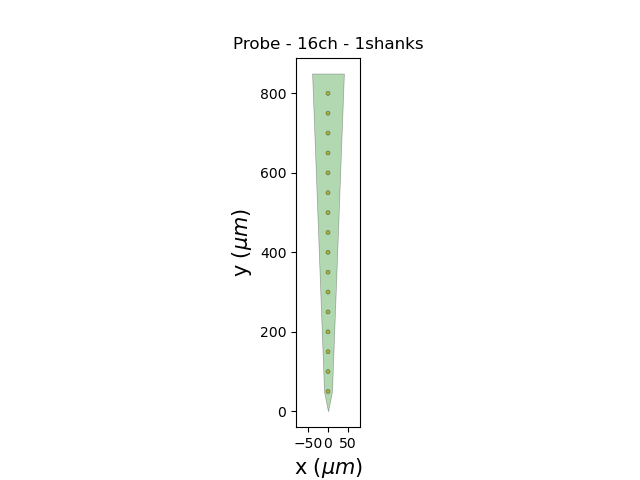

In [11]:
#create the probe object and set assign it to the concatenated recording
n = 16
positions = np.zeros((n, 2))
for i in range(n):
    x = 0
    y = i*50 + 50
    positions[i] = x, y
cm16lp = Probe(ndim=2, si_units='um')
cm16lp.set_contacts(positions=positions, shapes='circle', shape_params={'radius': 5})
polygon = [(-10, 50), (0, 0), (10, 50), (40, 850), (-40, 850)]
cm16lp.set_planar_contour(polygon)
cm16lp.set_device_channel_indices(np.arange(16))
plot_probe(cm16lp)
test_ex_concat = test_ex_concat.set_probe(cm16lp)

In [107]:
# attempt to run pykilosort on the concatenated recording
spk_out = '/Volumes/opto_loc/Data/ACR_PROJECT_MATERIALS/ACR_9/pykilosort_output/'
pks = ss.run_sorter('pykilosort', test_ex_concat, output_folder=spk_out)

write_binary_recording with n_jobs 1  chunk_size None
Traceback (most recent call last):
  File "/Volumes/scratch/gfindlay/pyks25/pyks_env/lib/python3.9/site-packages/spikeinterface/sorters/basesorter.py", line 200, in run_from_folder
    SorterClass._run_from_folder(output_folder, sorter_params, verbose)
  File "/Volumes/scratch/gfindlay/pyks25/pyks_env/lib/python3.9/site-packages/spikeinterface/sorters/pykilosort/pykilosort.py", line 70, in _run_from_folder
    assert isinstance(recording, BinaryRecordingExtractor)
AssertionError



SpikeSortingError: Spike sorting failed. You can inspect the runtime trace in /Volumes/opto_loc/Data/ACR_PROJECT_MATERIALS/ACR_9/pykilosort_output/spikeinterface_log.json